# Decision Tree Modeling and hyperparameter tuning




In [28]:
import pandas as pd
import plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import timeit
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings(action='once')

In [29]:
df = pd.read_csv('/Users/ej7793/Documents/CreditCard/Data/feature_engineered.csv')

predictor_list = pd.read_pickle(r'/Users/ej7793/Documents/CreditCard/src/predictor_list')

In [30]:
print(predictor_list)

['education_level_ 9th', 'occupation_ Priv-house-serv', 'asset_code_19.0', 'education_level_ 7th-8th', 'account_type_high_approval', 'asset_code_4.0', 'education_level_ HS-grad', 'occupation_ Craft-repair', 'education_level_ 12th', 'relationship_ Husband', 'occupation_ Transport-moving', 'education_level_ 5th-6th', 'education_level_ 10th', 'asset_code_2.0', 'education_level_ Assoc-voc', 'education_level_ Some-college', 'portfolio_type_I', 'relationship_ Unmarried', 'portfolio_type_R', 'institution_PVT', 'age_group_older_age', 'asset_code_1.0', 'education_level_ Assoc-acdm', 'portfolio_type_M', 'institution_BRO', 'workclass_ Private', 'education_level_ 11th', 'occupation_ Adm-clerical', 'education_level_ Bachelors', 'age_group_young', 'occupation_ Sales', 'workclass_ Self-emp-inc', 'workclass_ State-gov', 'education_level_ Masters', 'occupation_ Protective-serv', 'workclass_ Local-gov', 'relationship_ Not-in-family', 'hours_per_week', 'occupation_ Machine-op-inspct', 'education_level_ P

In [31]:
df.describe()

,education_num,hours_per_week,approved,married,hours,capital_net,inquiry,institution_BRO,institution_PVT,account_type_high_approval,...,occupation_ Tech-support,occupation_ Transport-moving,asset_code_1.0,asset_code_2.0,asset_code_4.0,asset_code_19.0,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
count,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,...,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000
mean,10.120202,40.940675,0.249869,0.467669,0.777182,557.719499,0.360765,0.006911,0.580731,0.001163,...,0.031544,0.051411,0.968342,0.025933,0.004379,0.001346,0.000342,0.382296,0.025204,0.592158
std,2.555691,12.014723,0.432942,0.498959,0.416142,2601.498611,0.480228,0.082846,0.493445,0.034087,...,0.174786,0.220837,0.175091,0.158939,0.066032,0.036660,0.018494,0.485954,0.156745,0.491439
min,1.000000,1.000000,0.000000,0.000000,0.000000,-4356.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,13.000000,45.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,16.000000,99.000000,1.000000,1.000000,1.000000,15024.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.dtypes

user_id              object
education_num       float64
hours_per_week      float64
approved              int64
married               int64
                     ...   
asset_code_19.0       int64
portfolio_type_F      int64
portfolio_type_I      int64
portfolio_type_M      int64
portfolio_type_R      int64
Length: 69, dtype: object

In [33]:
df.columns

Index(['user_id', 'education_num', 'hours_per_week', 'approved', 'married',
       'hours', 'capital_net', 'inquiry', 'institution_BRO', 'institution_PVT',
       'account_type_high_approval', 'account_type_mid_approval',
       'gender_ Female', 'gender_ Male', 'age_group_mid_age',
       'age_group_minor or senior', 'age_group_older_age', 'age_group_young',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'education_level_ 10th', 'education_level_ 11th',
       'education_level_ 12th', 'education_level_ 1st-4th',
       'education_level_ 5th-6th', 'education_level_ 7th-8th',
       'education_level_ 9th', 'education_level_ Assoc-acdm',
       'education_level_ Assoc-voc', 'education_level_ Bachelors',
       'education_level_ Doctorate', 'education_level_ HS-grad',
       'education_level_ Masters', 'education_level_ Preschool'

In [34]:
df = df.sample(10000)

X_train, X_final_test = train_test_split(df,test_size=0.2, random_state= 2)
X_final_test.to_csv('../Data/testing_dataset.csv', index = False)
## within the training dataset, split the data into training dataset and testing/validation dataset
X_train, X_test = train_test_split(X_train,test_size=0.2, random_state= 2)
print('records in training dataset')
print(len(X_train))
print('records in validation dataset')
print(len(X_test))
print('records in final testing dataset')
print(len(X_final_test))

records in training dataset
6400
records in validation dataset
1600
records in final testing dataset
2000


In [35]:
predictors = predictor_list
target = 'approved'


In [61]:
def modelfit(estimator,data_train,data_test,predictors,target):
    start = timeit.default_timer()
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    start1 = timeit.default_timer()
    train_pred=estimator.predict(data_train[predictors])
    stop1 = timeit.default_timer()
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=5,scoring='precision')

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on Train Data: %.4g" % metrics.accuracy_score(data_train.loc[:,target].values, train_pred))
    print ("Precision on Train Data: %.4g" % metrics.precision_score(data_train.loc[:,target].values, train_pred))
    print ("Recall on Train Data: %.4g" % metrics.recall_score(data_train.loc[:,target].values, train_pred))
    print ("F1 score on Train Data: %.4g" % metrics.f1_score(data_train.loc[:,target].values, train_pred))
    
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    start2 = timeit.default_timer()
    test_pred=estimator.predict(data_test[predictors])
    stop2 = timeit.default_timer()
    print ("Accuracy on Test Data: %.4g" % metrics.accuracy_score(data_test.loc[:,target].values, test_pred))  
    print ("Precision on Test Data: %.4g" % metrics.precision_score(data_test.loc[:,target].values, test_pred)) 
    print ("Recall on Test Data: %.4g" % metrics.recall_score(data_test.loc[:,target].values, test_pred)) 
    print ("F1 score on Test Data: %.4g" % metrics.f1_score(data_test.loc[:,target].values, test_pred)) 
    stop = timeit.default_timer()
    print('Total Time: ', stop - start)
    print('training time: ', stop1 - start1)
    print('testing time: ', stop2 - start2)
    return test_pred


In [37]:
X_test.approved.value_counts(normalize =True)

0    0.749375
1    0.250625
Name: approved, dtype: float64

## Helper functions

In [38]:
## create learning curve ploting function

from sklearn.model_selection import learning_curve
##learning curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
def plot_learning_curve(alg, X, y, scoring_metric, algorithm_name):
    sizes, training_scores, testing_scores = learning_curve(alg, X, y, cv=5, scoring= scoring_metric, train_sizes=np.linspace(0.01, 1.0, 30))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)

    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)

    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    # Drawing plot
    plt.title("LEARNING CURVE FOR %s" % algorithm_name)
    plt.xlabel("Training Set Size"), plt.ylabel("%s Score" % scoring_metric), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return

In [39]:
# create validation curve ploting function


 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
def plot_validation_curve(alg,X, y, param_name, parameter_range, scoring_metric, algorithm_name):
    train_score, test_score = validation_curve(alg, X, y,
                                           param_name = param_name,
                                           param_range = parameter_range,
                                            cv = 5, scoring = scoring_metric)

    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with %s" % algorithm_name)
    plt.xlabel("%s" % param_name)
    plt.ylabel("%s" % scoring_metric)
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()
    return

## Modeling

## Decision Tree

**Baseline Model**

In [40]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier(random_state = 1)
y_pred=modelfit(cart, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9841
Precision on Train Data: 0.993
Recall on Train Data: 0.945
F1 score on Train Data: 0.9684
CV Score : Mean - 0.6399 | Std - 0.01445 | Min - 0.615 | Max - 0.6594
Accuracy on Test Data: 0.8313
Precision on Test Data: 0.6633
Recall on Test Data: 0.6633
F1 score on Test Data: 0.6633
Time:  0.27317700599996897


## Model Analysis

In [41]:
X = X_train[predictors]
y = X_train[target]

**Learning curve**

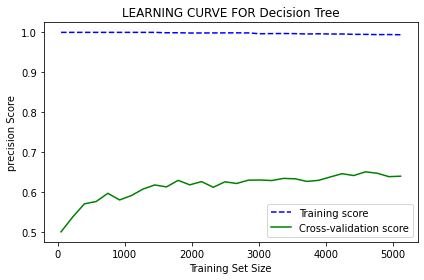

In [56]:
plot_learning_curve(cart, X, y, 'precision', 'Decision Tree')

**Validation curve**

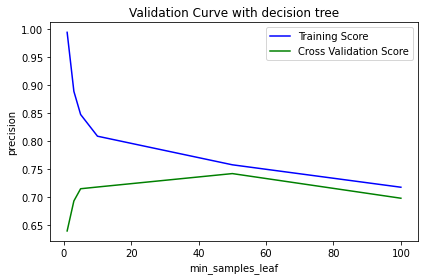

In [43]:
##min_samples_leaf
## min samples in each node
##converges at 50
parameter_range = [1, 3, 5, 10, 50, 100]
plot_validation_curve(cart ,X, y, "min_samples_leaf", parameter_range, "precision", 'decision tree')

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

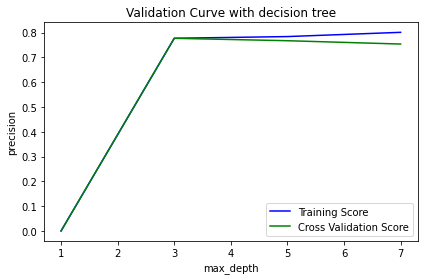

In [44]:
##max_depth
## at max_depth 3, training and corss validation score converges
parameter_range = [1, 3, 5, 7]
plot_validation_curve(cart ,X, y, "max_depth", parameter_range, "precision", 'decision tree')

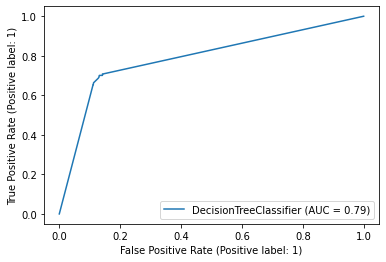

In [45]:
## ROC curve
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

plot_roc_curve(cart, X_test[predictors], X_test[target])

**Grid search for best hyperparameter set**

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
              'max_depth': [1, 3, 5, 7],
              'min_samples_leaf': [1, 3, 5, 10, 50, 100]}
grid_lr = GridSearchCV(estimator =cart, param_grid= param_grid, scoring='precision', 
                        refit=True, return_train_score=True) 
grid_lr.fit(X,y)

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5, 10, 50, 100]},
             return_train_score=True, scoring='precision')

In [47]:
print(grid_lr.best_estimator_)

print(grid_lr.best_params_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=1)
{'max_depth': 5, 'min_samples_leaf': 50}


**New model after hyperparameter tuning**

In [48]:
cart_tuned = grid_lr.best_estimator_


In [49]:
y_pred=modelfit(cart_tuned, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8406
Precision on Train Data: 0.7795
Recall on Train Data: 0.5345
F1 score on Train Data: 0.6341
CV Score : Mean - 0.7774 | Std - 0.0422 | Min - 0.7313 | Max - 0.8542
Accuracy on Test Data: 0.8413
Precision on Test Data: 0.7712
Recall on Test Data: 0.5212
F1 score on Test Data: 0.622
Time:  0.17896095700007209


In [50]:
## compare with before hyper parameter tuning 
y_pred=modelfit(cart, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9841
Precision on Train Data: 0.993
Recall on Train Data: 0.945
F1 score on Train Data: 0.9684
CV Score : Mean - 0.6399 | Std - 0.01445 | Min - 0.615 | Max - 0.6594
Accuracy on Test Data: 0.8313
Precision on Test Data: 0.6633
Recall on Test Data: 0.6633
F1 score on Test Data: 0.6633
Time:  0.3007785539998622


**Learning curve after hyper parameter tuning**

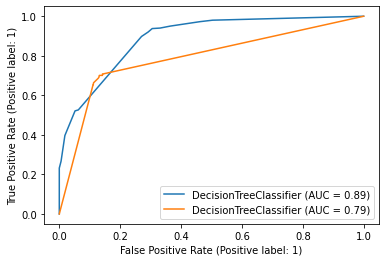

In [51]:
disp = plot_roc_curve(cart_tuned, X_test[predictors], X_test[target])
plot_roc_curve(cart,X_test[predictors], X_test[target], ax= disp.ax_);

**ROC curve comafter hyper parameter tuning** 

In [52]:
cart_tuned.fit(X_train[predictors],X_train[target])

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=1)

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

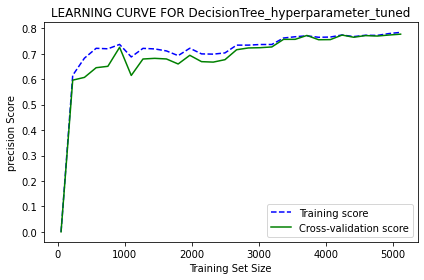

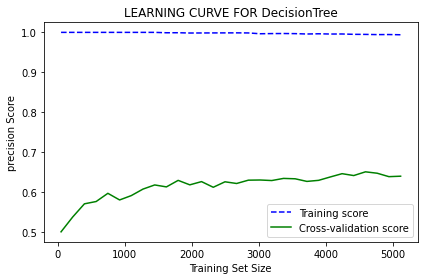

In [55]:
disp = plot_learning_curve(cart_tuned, X, y, 'precision', 'DecisionTree_hyperparameter_tuned')
plot_learning_curve(cart, X, y, 'precision', 'DecisionTree');

## Final prediction results and performance 

In [62]:
y_pred=modelfit(cart_tuned, X_train, X_final_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8406
Precision on Train Data: 0.7795
Recall on Train Data: 0.5345
F1 score on Train Data: 0.6341
CV Score : Mean - 0.7774 | Std - 0.0422 | Min - 0.7313 | Max - 0.8542
Accuracy on Test Data: 0.8455
Precision on Test Data: 0.7765
Recall on Test Data: 0.5483
F1 score on Test Data: 0.6428
Total Time:  0.11711324800853617
training time:  0.004854728002101183
testing time:  0.003067527009989135


In [64]:
X_final_test.shape

(2000, 69)